In [1]:
%load_ext autoreload
%autoreload 2

In [26]:
import seaborn as sns
import pandas as pd
import scipy
import glob
import os
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import trial
from analysis.map import Map
from analysis.persistence_diagram import PersistenceDiagram
from analysis.persistence_diagram import BettiNumbersGridVarianceMap, PixelDistinguishingPowerMap
import analysis.cosmologies as cosmologies
from analysis.emulator import GPREmulator, MLPREmulator, PerFeatureGPREmulator
from analysis.data_compression.betti_number_peaks import BettiNumberPeaksCompressor
from analysis.data_compression.histogram import HistogramCompressor


In [3]:
data_range = trial.find_max_min_values_maps()

print(data_range)

# TODO: compare SLICS variance with cosmoSLICS variance
# that is, compare los variance within SLICS to variance between different cosmologies

# SLICS determines the sample variance, will be a list of persistence diagrams for each line of sight
slics_pds = []
# cosmoSLICS is different cosmologies, will be a list of persistence diagrams for each cosmology
cosmoslics_pds = []
# cosmoslics_uniq_pds = []

slics_maps = []
# cosmoslics_maps = []

print('Analyzing maps...')
for dir in tqdm(glob.glob('maps/*')):
	if os.path.isdir(dir):
		cosm = dir.split('_')[-1]

		cosmoslics = 'Cosmo' in cosm

		curr_cosm_maps = []
		for i, map_path in enumerate(tqdm(glob.glob(f'{dir}/*.npy'), leave=False)):
			map = Map(map_path)
			map.get_persistence()
			curr_cosm_maps.append(map)


			# SLICS must be saved at LOS level
			if not cosmoslics:
				perdi = PersistenceDiagram([map])
				perdi.generate_betti_numbers_grids(resolution=100, data_ranges_dim=data_range)
				slics_pds.append(perdi)
				slics_maps.append(map)
			else:
				pass
				# cosmoslics_uniq_pds.append(perdi)
				# cosmoslics_maps.append(map)

		if len(curr_cosm_maps) > 0:
			perdi = PersistenceDiagram(curr_cosm_maps)
			# pd.generate_heatmaps(resolution=100, gaussian_kernel_size_in_sigma=3)
			# pd.add_average_lines()
			perdi.generate_betti_numbers_grids(resolution=100, data_ranges_dim=data_range)

			# perdi.plot()

			# cosmoSLICS must be saved at cosmology level
			if cosmoslics:
				cosmoslics_pds.append(perdi)

print('Calculating SLICS/cosmoSLICS variance maps...')
slics_bngs = {
	dim: [pd.betti_numbers_grids[dim] for pd in slics_pds] for dim in [0, 1]
}
cosmoslics_bngs = {
	dim: [pd.betti_numbers_grids[dim] for pd in cosmoslics_pds] for dim in [0, 1]
}

dim = 0
slics_bngvm_0 = BettiNumbersGridVarianceMap(slics_bngs[dim], birth_range=data_range[dim], death_range=data_range[dim], dimension=dim)
slics_bngvm_0.save_figure(os.path.join('plots', 'slics'), title='SLICS variance, dim=0')
dim = 1
slics_bngvm_1 = BettiNumbersGridVarianceMap(slics_bngs[dim], birth_range=data_range[dim], death_range=data_range[dim], dimension=dim)
slics_bngvm_1.save_figure(os.path.join('plots', 'slics'), title='SLICS variance, dim=1')

dim = 0
cosmoslics_bngvm_0 = BettiNumbersGridVarianceMap(cosmoslics_bngs[dim], birth_range=data_range[dim], death_range=data_range[dim], dimension=dim)
cosmoslics_bngvm_0.save_figure(os.path.join('plots', 'cosmoslics'), title='cosmoSLICS variance, dim=0')
dim = 1
cosmoslics_bngvm_1 = BettiNumbersGridVarianceMap(cosmoslics_bngs[dim], birth_range=data_range[dim], death_range=data_range[dim], dimension=dim)
cosmoslics_bngvm_1.save_figure(os.path.join('plots', 'cosmoslics'), title='cosmoSLICS variance, dim=1')

slics_pd = PersistenceDiagram(slics_maps)
slics_pd.generate_betti_numbers_grids(data_ranges_dim=data_range)

dist_powers = []

for dim in [0, 1]:
	slics_var_map = BettiNumbersGridVarianceMap(slics_bngs[dim], birth_range=data_range[dim], death_range=data_range[dim], dimension=dim)
	slics_var_map.save(os.path.join('products', 'bng_variance', 'slics'))
	slics_var_map.save_figure(os.path.join('plots', 'bng_variance', 'slics'))
	dist_power = PixelDistinguishingPowerMap([cpd.betti_numbers_grids[dim] for cpd in cosmoslics_pds], slics_pd.betti_numbers_grids[dim], slics_var_map, dimension=dim)
	dist_power.save(os.path.join('products', 'pixel_distinguishing_power'))
	dist_power.save_figure(os.path.join('plots', 'pixel_distinguishing_power'))

	dist_powers.append(dist_power)

Determining max and min values in maps...
Found file with saved values, reading...
{0: [-0.05554313552952604, 0.03412921981880379], 1: [-0.029925435485797586, 0.07432709544723744]}
Analyzing maps...


  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/218 [00:00<?, ?it/s]

Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2 is fiducial cosmology
Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2 is fiducial cosmology
Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2 is fiducial cosmology
Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2 is fiducial cosmology
Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2 is fiducial cosmology
Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2 is fiducial cosmology
Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2 is fiducial cosmology
Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2 is fiducial cosmology
Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2 is fiducial cosmology
Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosai

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Calculating SLICS/cosmoSLICS variance maps...
Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2 is fiducial cosmology


/net/vdesk/data2/bach1/abbo/mrp/mrp/analysis/persistence_diagram.py:360: RuntimeWarning: divide by zero encountered in divide
  self.map = np.mean(np.square([cbng.map for cbng in cosmoslics_bngs] - slics_bng.map) / slics_variance.map, axis=0)
/net/vdesk/data2/bach1/abbo/mrp/mrp/analysis/persistence_diagram.py:360: RuntimeWarning: invalid value encountered in divide
  self.map = np.mean(np.square([cbng.map for cbng in cosmoslics_bngs] - slics_bng.map) / slics_variance.map, axis=0)


/net/vdesk/data2/bach1/abbo/mrp/mrp/conda_mrp/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)


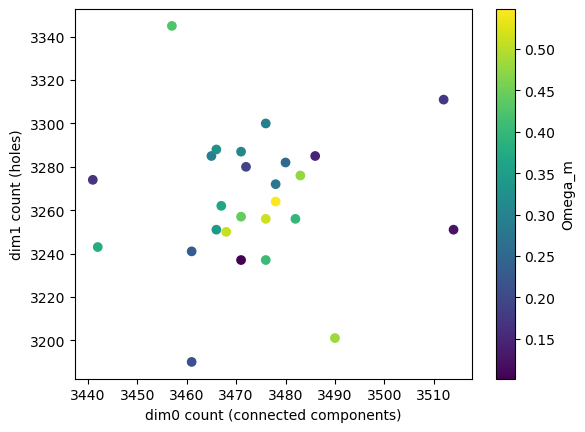

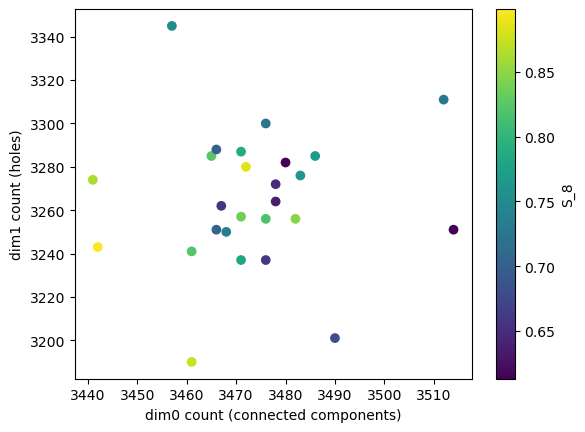

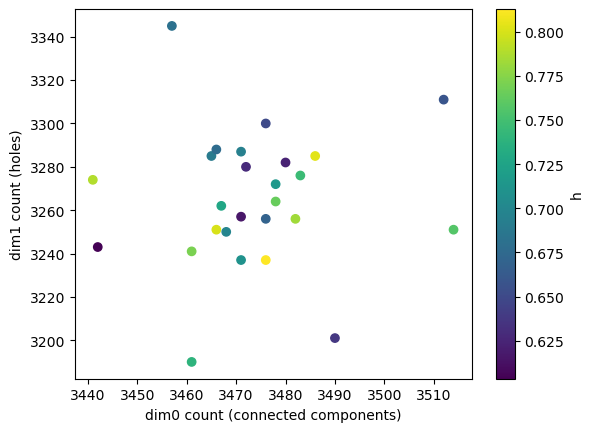

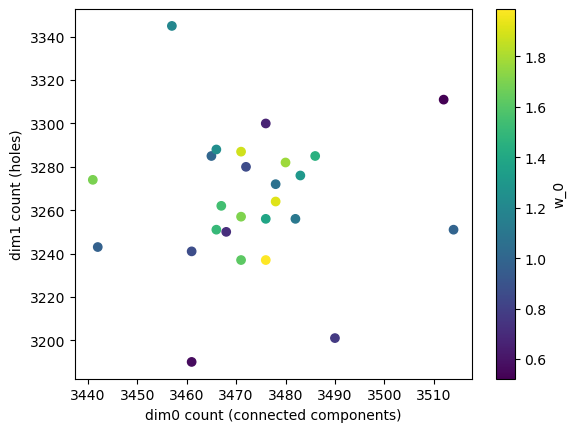

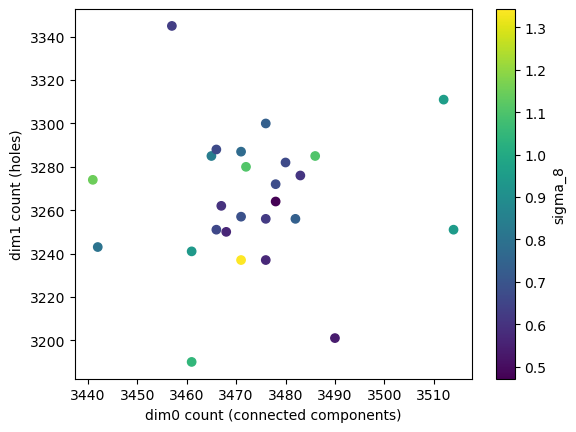

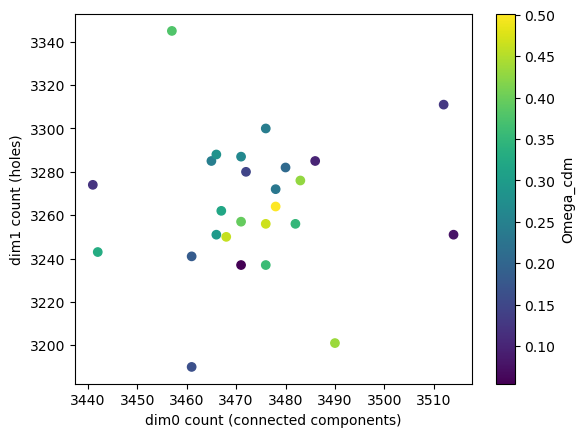

In [4]:
dim0_count = []
dim1_count = []
cosmology_ids = []

cosmologies_info_df = trial.read_cosmologies_info()

for cspd in cosmoslics_pds:
	# print(cspd.cosmology)
	cosmology_ids.append(cspd.cosmology_id)
	# print('dim 0 featurecount =', len(cspd.dimension_pairs[0]))
	dim0_count.append(len(cspd.dimension_pairs[0]))
	# print('dim 1 featurecount =', len(cspd.dimension_pairs[1]))
	dim1_count.append(len(cspd.dimension_pairs[1]))


for col in ['Omega_m', 'S_8', 'h', 'w_0', 'sigma_8', 'Omega_cdm']:
	fig, ax = plt.subplots()
	scax = ax.scatter(dim0_count, dim1_count, c=[cosmologies_info_df[cosmologies_info_df['id'] == id][col] for id in cosmology_ids])
	cbar = fig.colorbar(scax)
	cbar.set_label(f'{col}')
	ax.set_xlabel('dim0 count (connected components)')
	ax.set_ylabel('dim1 count (holes)')

	# fig, ax = plt.subplots()
	# ax.scatter(dim1_count, [cosmologies_info_df[cosmologies_info_df['id'] == id][col] for id in cosmology_ids])
	# ax.set_xlabel('dim1 count (holes)')
	# ax.set_ylabel(f'{col}')

In [5]:
# for perdi in cosmoslics_pds:
# 	fig, ax = perdi.plot(close=False)

# 	S_8 = cosmologies_info_df[cosmologies_info_df['id'] == perdi.cosmology_id]['S_8'].values[0]

# 	ax.set_title(f'$S_8$={S_8}')
# 	fig.savefig(f'plots/perdis_vid/{S_8}.png')
# 	plt.close(fig)

In [6]:
# fig, ax = plt.subplots()
# ax.set_title('slics / cosmoslics variance, dim=0')
# imax = ax.imshow((slics_bngvm_0.map / cosmoslics_bngvm_0.map)[::-1, :])
# fig.colorbar(imax)
# fig.savefig(os.path.join('plots', 'slics_cosmoslics_variance_0.png'))
# plt.close(fig)

# fig, ax = plt.subplots()
# ax.set_title('slics / cosmoslics variance, dim=1')
# imax = ax.imshow((slics_bngvm_1.map / cosmoslics_bngvm_1.map)[::-1, :])
# fig.colorbar(imax)
# fig.savefig(os.path.join('plots', 'slics_cosmoslics_variance_1.png'))
# plt.close(fig)

In [8]:
%%script false --no-raise-error

cosmoslics_pds_rot = rotate_perdis(cosmoslics_pds)

for perdi in cosmoslics_pds_rot:
	fig, ax = plt.subplots()
	ax.set_title(perdi.cosmology)

	fig, axv = plt.subplots()
	axv.set_title(perdi.cosmology)

	for dim in [0, 1]:
		ax.hist(perdi.dimension_pairs[dim][:, 0], bins=20)
		axv.hist(perdi.dimension_pairs[dim][:, 1], bins=20, orientation='horizontal')

In [10]:
def test_sklearn_method(method, varied_argument=None, plot_function=None, **method_args):

	if varied_argument is not None:
		varied_values = varied_argument['values']
		varied_name = varied_argument['name']
		ncols = len(varied_values)
	else:
		ncols = 1

	if plot_function is not None:
		fig, ax = plt.subplots(ncols=ncols, nrows=len(cosmoslics_pds), sharex=True, sharey=True, figsize=(16, 50))

	results = []

	for row, perdi in enumerate(cosmoslics_pds):
		if varied_argument is not None:
			results.append([])

		for col in range(ncols):
			if varied_argument is None:
				hdb = method(**method_args)
				results.append(hdb)
			else:
				curr_method_args = method_args.copy()
				curr_method_args[varied_name] = varied_values[col]
				hdb = method(**curr_method_args)
				results[-1].append(hdb)

			# Skip holes for now
			dim = 0

			hdb.fit(perdi.dimension_pairs[dim])
			if plot_function is not None:
				curr_ax = ax[row, col] if ncols > 1 else ax[row]

				plot_function(perdi, hdb, dim, curr_ax)
				if col == 0:
					curr_ax.set_title(perdi.cosmology)
				if col == 0 and varied_argument is not None:
					curr_ax.set_ylabel(f'{varied_name}={varied_values[col]}')
		
		fig.tight_layout()
	
	return results



In [11]:
%%script false --no-raise-error

def plot_aggclu(perdi, sklearn_method, dim, ax):
	ax.scatter(perdi.dimension_pairs[dim][:, 0], perdi.dimension_pairs[dim][:, 1], c=sklearn_method.labels_)

test_sklearn_method(AgglomerativeClustering, varied_argument={
	'name': 'n_clusters',
	'values': [2, 4, 6, 8, 9, 10]
}, plot_function=plot_aggclu)

In [12]:
%%script false --no-raise-error

test_sklearn_method(AgglomerativeClustering, n_clusters=8, varied_argument={
	'name': 'linkage',
	'values': ['ward', 'complete', 'average', 'single']
}, plot_function=plot_aggclu)

In [13]:
%%script false --no-raise-error

from sklearn.decomposition import PCA

def plot_pca(perdi, sklearn_method, dim, ax):
	ax.scatter(sklearn_method.components_[:, 0], sklearn_method.components_[:, 1])
	
test_sklearn_method(PCA, plot_function=plot_pca)

In [15]:
def plot_target_data_vectors(training_set):
	for target_data in training_set['target']:
		fig, ax = plt.subplots()
		ax.plot(np.log10(target_data))


(26, 49)
(26, 39)


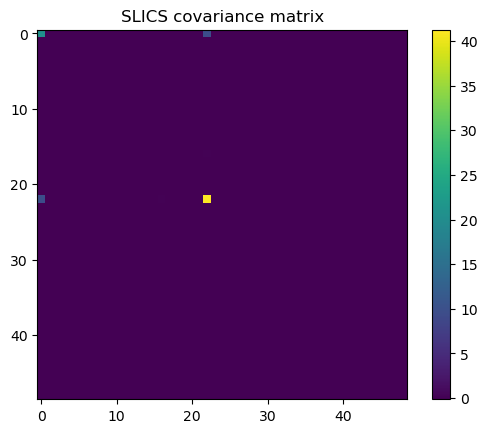

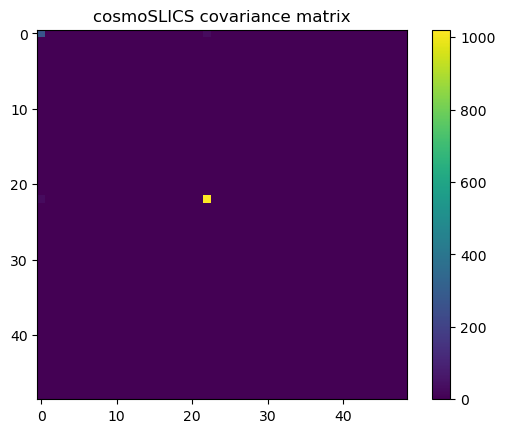

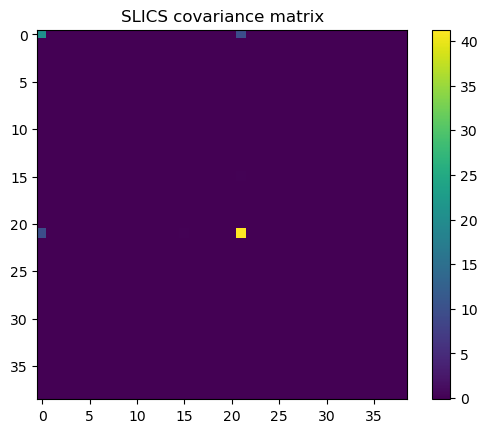

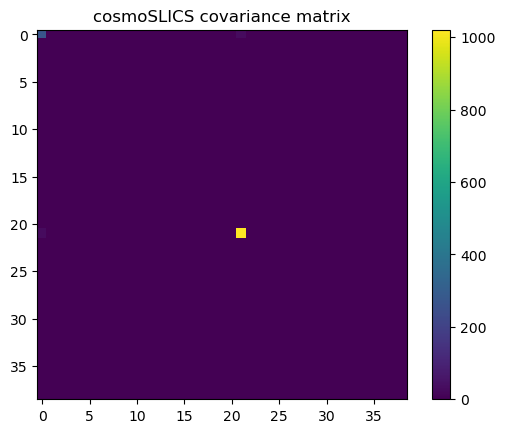

In [35]:
bnp_c = BettiNumberPeaksCompressor(cosmoslics_pds, slics_pds, dist_powers)
bnp_c.plot_covariance_matrices()
print(bnp_c.cosmoslics_training_set['target'].shape)
# print(bnp_c.cosmoslics_training_set['target'])
# print(bnp_c.cosmoslics_training_set['target'].T)

# print(bnp_c.cosmoslics_covariance_matrix)

bnp_c = BettiNumberPeaksCompressor(cosmoslics_pds, slics_pds, dist_powers, min_count=20)
bnp_c.plot_covariance_matrices()
print(bnp_c.cosmoslics_training_set['target'].shape)

Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2_rotated is fiducial cosmology
Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2_rotated is fiducial cosmology
Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2_rotated is fiducial cosmology
Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2_rotated is fiducial cosmology
Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2_rotated is fiducial cosmology
Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2_rotated is fiducial cosmology
Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2_rotated is fiducial cosmology
Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2_rotated is fiducial cosmology
Assuming MRres140.64arcs_100Sqdeg_SN0.27_Mosaic_KiDS1000GpAM_zKiDS1000_ZBcut0.9-1.2_rota

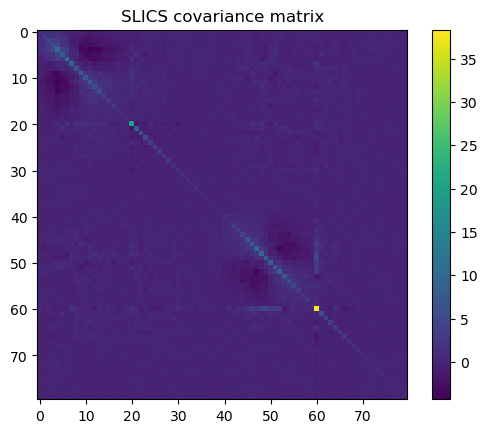

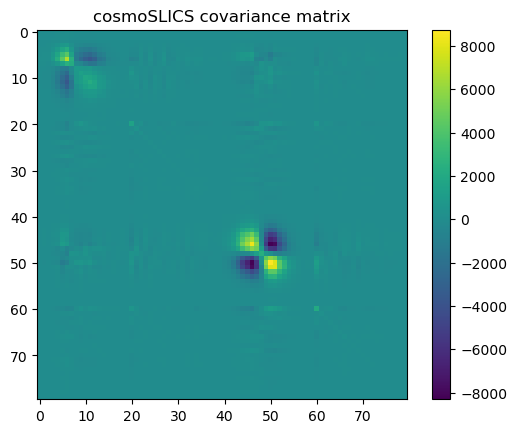

In [28]:
hist_comp = HistogramCompressor(cosmoslics_pds, slics_pds)
hist_comp.plot_covariance_matrices()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


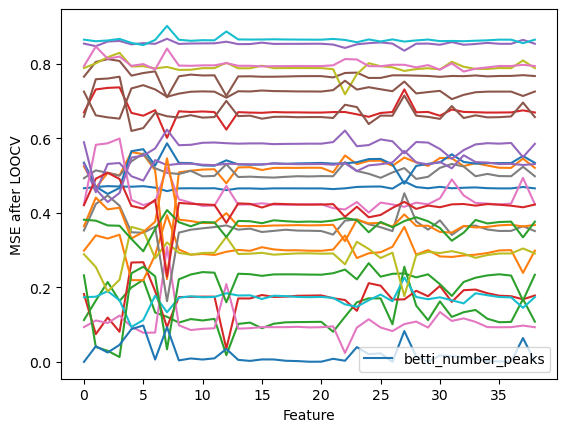

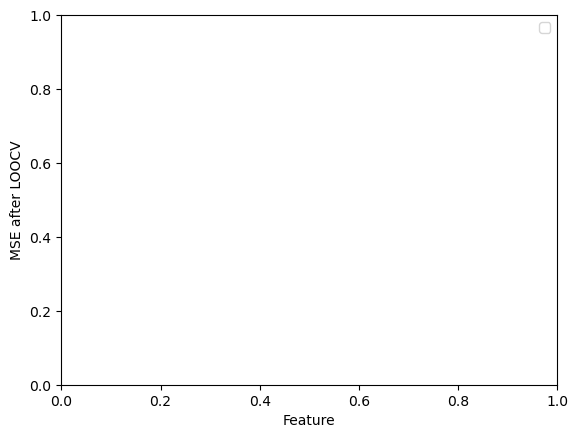

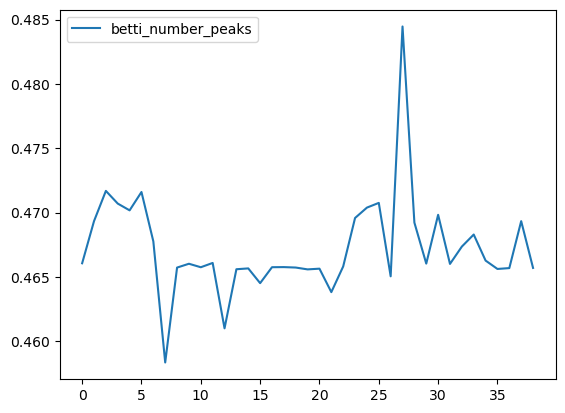

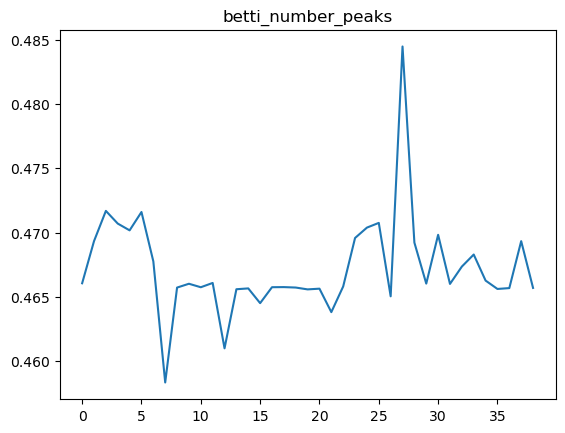

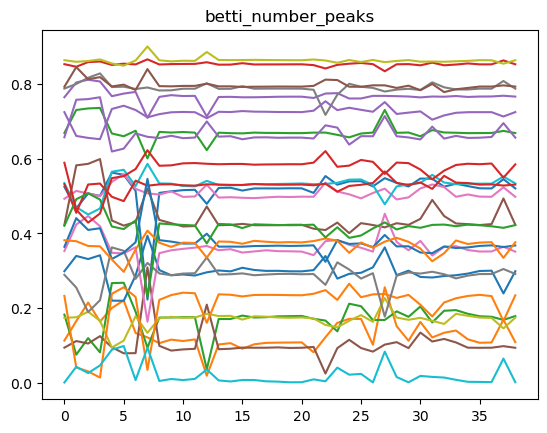

In [34]:

fig, ax_gpre = plt.subplots()
fig, ax_mlpre = plt.subplots()
fig, ax = plt.subplots()

training_sets = [bnp_c.cosmoslics_training_set]#, training_set_histboth, training_set_histx]

for training_set in training_sets:
	gpre = GPREmulator(training_set)
	gpre_validation, gpre_indiv_val = gpre.validate()
	
	ax_gpre.plot(gpre_validation, label=training_set['name'])
	ax_gpre.plot(np.array(gpre_indiv_val).T)

	ax.plot(gpre_validation, label=training_set['name'])
	ax.legend()

	fig, ax_solo = plt.subplots()
	ax_solo.set_title(training_set['name'])
	ax_solo.plot(gpre_validation)

	fig, ax_solo_all = plt.subplots()
	ax_solo_all.set_title(training_set['name'])
	ax_solo_all.plot(np.array(gpre_indiv_val).T)

	# mlpre = MLPREmulator(training_set)
	# mlpre_validation, mlpre_indiv_val = mlpre.validate()
	
	# ax_mlpre.plot(gpre_validation, label=training_set['name'])

ax_gpre.legend()
ax_mlpre.legend()

for ax in [ax_gpre, ax_mlpre]:
	ax.set_ylabel('MSE after LOOCV')
	ax.set_xlabel('Feature')
	# ax.semilogy()


/net/vdesk/data2/bach1/abbo/mrp/mrp/analysis/emulator.py:96: RuntimeWarning: invalid value encountered in divide
  mse.append(np.abs(test_target - regr.predict(test_input)[0]) / test_target)
/net/vdesk/data2/bach1/abbo/mrp/mrp/analysis/emulator.py:96: RuntimeWarning: invalid value encountered in divide
  mse.append(np.abs(test_target - regr.predict(test_input)[0]) / test_target)
/net/vdesk/data2/bach1/abbo/mrp/mrp/analysis/emulator.py:96: RuntimeWarning: invalid value encountered in divide
  mse.append(np.abs(test_target - regr.predict(test_input)[0]) / test_target)
/net/vdesk/data2/bach1/abbo/mrp/mrp/analysis/emulator.py:96: RuntimeWarning: invalid value encountered in divide
  mse.append(np.abs(test_target - regr.predict(test_input)[0]) / test_target)
/net/vdesk/data2/bach1/abbo/mrp/mrp/analysis/emulator.py:96: RuntimeWarning: invalid value encountered in divide
  mse.append(np.abs(test_target - regr.predict(test_input)[0]) / test_target)
/net/vdesk/data2/bach1/abbo/mrp/mrp/analysis/

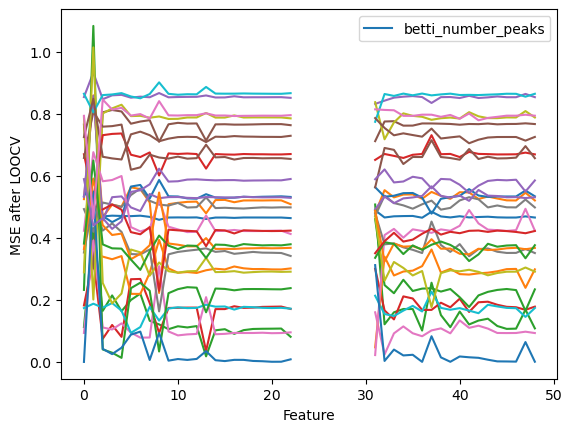

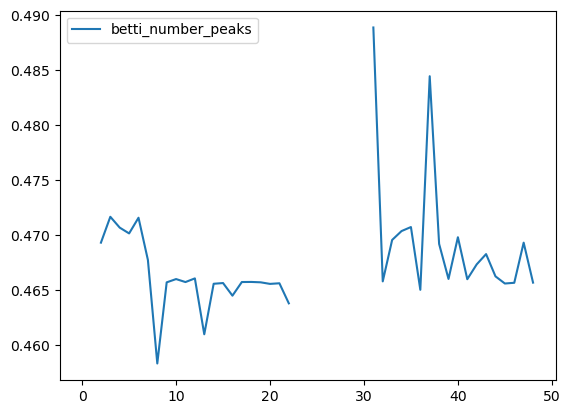

In [29]:
fig, ax_gpre = plt.subplots()
# fig, ax_mlpre = plt.subplots()
fig, ax = plt.subplots()

training_sets = [bnp_c.cosmoslics_training_set]#, training_set_histboth, training_set_histx]

for training_set in training_sets:
	gpre = PerFeatureGPREmulator(training_set)
	gpre_validation, gpre_indiv_val = gpre.validate()
	
	ax_gpre.plot(gpre_validation, label=training_set['name'])
	ax_gpre.plot(np.array(gpre_indiv_val).T)

	ax.plot(gpre_validation, label=training_set['name'])
	ax.legend()

	# mlpre = MLPREmulator(training_set)
	# mlpre_validation, mlpre_indiv_val = mlpre.validate()
	
	# ax_mlpre.plot(gpre_validation, label=training_set['name'])

ax_gpre.legend()
# ax_mlpre.legend()

for ax in [ax_gpre]:
	ax.set_ylabel('MSE after LOOCV')
	ax.set_xlabel('Feature')
	# ax.semilogy()


$$\mathrm{Pixel\ distinguishing\ power} = \frac{1}{N_\mathrm{cosmoSLICS}}\sum_{\mathrm{cosmoSLICS}}\frac{(\mathrm{BNG}_{i} - \mathrm{BNG_{SLICS}})^2}{\sigma_\mathrm{SLICS}}$$